# <center>**Итоговый проект "Очистка и визуализация данных"**</center>

В данной работе мы проведем анализ 3 датасетов с платформы kaggle.com с набором данных о НАЖБП (неалкогольной жировой болезни печени), выполним базовый анализ предоставленных файлов, построим визуализации, проведем очистку данных и сделаем выводы.

*К сожалению, для работы нам предоствлен ошибочный набор датасетов, и [третий_датасет](https://www.kaggle.com/code/rajathrpai/missing-file-nafld3-csv) находится в комментариях.*

### <center>**НАЖБП**</center>
**Факторы риска развития НАЖБП**

+ Несбалансированное питание, употребление жирной, жареной пищи, сладкого, злоупотребление кофеином, никотином, алкоголем
+ Хронический стресс
+ Ожирение, высокий уровень холестерина и триглицеридов в крови
+ Генетические факторы
+ Сопутствующая патология (сахарный диабет II типа, заболевания сердечно-сосудистой системы, гормональные и обменные нарушения).

*по данным Всемироной Гастроэнтерологической организации,  ["Практические рекомендации Всемирной Гастроэнтерологической Организации"](https://www.worldgastroenterology.org/guidelines/nafld-nash/nafld-nash-russian)*

### **<center> Первичная обработка данных первого датасета</center>**

In [76]:
# Импортируем библиотеки, которые могут нам понадобится в работе
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#Прочитаем первый датасет и посмотрим на первые 5 строк
nafld1_data = pd.read_csv('nafld1.csv')
nafld1_data.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [78]:
#Прочитаем первый датасет и посмотрим на последние 5 строк
display(nafld1_data.tail())

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
17544,11130,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,1099,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,1522,17564,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,5764,17565,61,0,NaN,NaN,NaN,17276.0,3627,1
17548,6658,17566,69,1,94.1,180.0,29.204650,2017.0,2744,0


**Вывод** в датасете есть пропущенные значения, NaN

In [79]:
#Получим информацию о количестве строк и столбцов
nafld1_data.shape

(17549, 10)

In [80]:
#Получим детальную информацию о столбцах и типах данных
nafld1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


Из вывода данных следует, что в таблице всего 10 столбцов, в которых нет пропусков значений, типы данных float64 и int64 . В столбце male и status результат может быть только 0 или 1. 

In [81]:
# получим описательную статистику по столбцам
nafld1_data.describe() 

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
count,17549.000000,17549.000000,17549.000000,17549.000000,12763.000000,14381.000000,12588.000000,17518.000000,17549.000000,17549.000000
mean,8780.106046,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,8840.924478,2410.600547,0.077725
std,5070.539328,5070.970712,14.722515,0.498945,22.239458,10.141421,7.085435,5051.334075,1573.017638,0.267746
min,1.000000,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,3.000000,7.000000,0.000000
25%,4389.000000,4393.000000,42.000000,0.000000,70.000000,162.000000,25.136434,4598.000000,1132.000000,0.000000
50%,8778.000000,8786.000000,53.000000,0.000000,83.900000,169.000000,28.875884,8781.000000,2148.000000,0.000000
75%,13171.000000,13175.000000,63.000000,1.000000,99.200000,177.000000,33.710372,13249.000000,3353.000000,0.000000
max,17566.000000,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,17563.000000,7268.000000,1.000000


При анализе столбцов получили следующие данные:

*Столбец "Unnamed: 0"*
Нет интерпретации по данным этого столбца, удалим его в дальнейшем, так как неясно, как использовать данные

*Столбец "Id"*
В первом датасете максимальный ID 17566, однако в графе count 17549 наблюдений. Проверим данные на дубликаты позднее.

*Столбец "age"*

В исследовании принимали участие пациенты от 18 до 98 лет, средний возраст 52,7 года

*Столбец "male"*

Пол мужской - 1, женский - 0: можно в последующем привести данные к типу Category

*Столбец "weight"*

Вес пациентов от 33,4 до 181,7 кг, однако мы видим, что количество измерений 12763, что на 5000 меньше всех наблюдений 17549. Средий вес составил 86,4 кг

*Столбец "height"*

Вес пациентов от 123 до 215 кг, однако мы видим, что количество измерений 14381, что на 3000 меньше всех наблюдений 17549. Средий вес составил 169,4 см

*Столбец "bmi"*

Индекс массы тела, далее напишем фунцию для прозрачной интерпретации массы тела пациента. Среднее значение - 30.0.

*Столбец "case.id"*

идентификатор случая НАЖБП, который соответствует этот объект.

*Столбец "futime"*

прошедшее время до последнего наблюдения или смерти (в днях). Не очень информативный столбец, так как существует огромная разница между прекращением участия в исследовании по любой причине и смертью от заболевания.

*Столбец "status"*

1 — умерший, 0 — живой на момент последнего визита

**Вывод**

В датасете столбцы связаны только с 1 фактором риска развития НАЖБП - ожирением, влияние остальных известных факторов риска в данной работе не исследовалось. Для дальнейшей работы необходимо провести очистку и фильтрацию данных для получения достоверного результата исследования.

In [82]:
# Удаляем столбец Unnamed: 0, так как он не несет клинической значимости
nafld1_data = nafld1_data.drop(columns=['Unnamed: 0'])

# Проверяем результат
print(nafld1_data.head())

   id  age  male  weight  height        bmi  case.id  futime  status
0   1   57     0    60.0   163.0  22.690939  10630.0    6261       0
1   2   67     0    70.4   168.0  24.884028  14817.0     624       0
2   3   53     1   105.8   186.0  30.453537      3.0    1783       0
3   4   56     1   109.3   170.0  37.830100   6628.0    3143       0
4   5   68     1     NaN     NaN        NaN   1871.0    1836       1


In [83]:
#проверим наличие пропусков в датасете
display(nafld1_data.isnull().tail())

,id,age,male,weight,height,bmi,case.id,futime,status
17544,False,False,False,False,False,False,False,False,False
17545,False,False,False,False,False,False,False,False,False
17546,False,False,False,False,True,True,False,False,False
17547,False,False,False,True,True,True,False,False,False
17548,False,False,False,False,False,False,False,False,False


**Вывод**: из таблицы можно увидеть, где были пропущены значения: ячейки со значением True; ячейки, где стоит False, были изначально заполнены

In [84]:
# Выведем на экран названия столбцов, где число пропусков больше 0.
# Для этого вычислим средний по столбцам результат метода isnull() и получим долю пропусков в каждом столбце.
# Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат
cols_null_percent = nafld1_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

bmi        28.269417
weight     27.272209
height     18.052311
case.id     0.176648
dtype: float64

**Вывод**: можно увидеть, что у нас 2 столбца с числом пропусков более 20% в столбцах bmi и weight, 18% пропусков в столбце height и менее 1% пропусков в столбце case.id. 
В дальнейшем мы не будем использовать столбцы bmi и weight, так как в них пропущено более 20% данных, а вот столбцы height и case.id можно будет взять в работу.

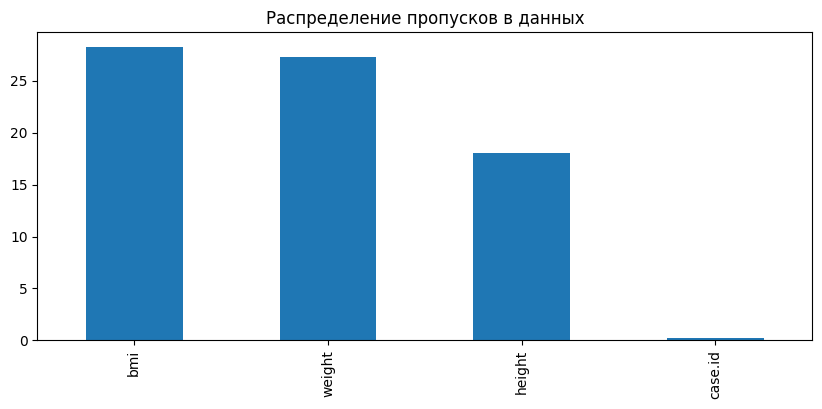

In [85]:
#Построим столбчатую диаграмму, чтобы визуально оценить соотношение числа пропусков к числу записей
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

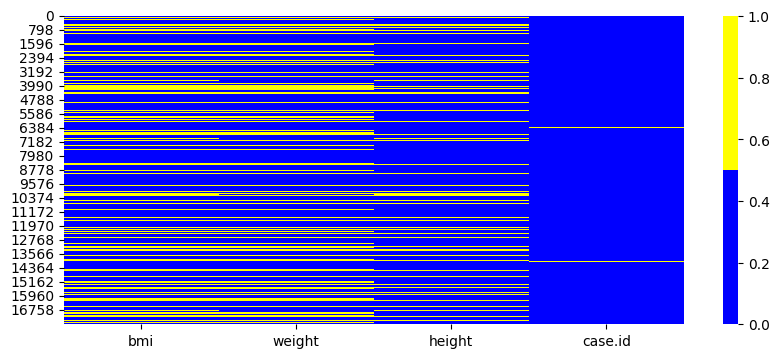

In [86]:
#Построим тепловую карту, чтобы понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    nafld1_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

**Вывод** На полученной тепловой карте мы можем увидеть места их концентрации в таблице. Например, видно, что признаки bmi и weight очень сильно связаны друг с другом по части пропусков: в большей части записей, где хотя бы один не определён, не указан и второй (жёлтые линии для двух этих признаков полностью совпадают друг с другом). С этими столбцами связан и столбец height, но его заполняли чаще.

 ### **<center> Визуализация данных </center>**

**Histplot**


Гистограмма (histplot) используется для визуализации распределения значений одной переменной.


*Использование:*

Позволяет увидеть, как данные распределены (нормальное распределение, скошенное, равномерное и т.д.).

Помогает выявить выбросы и аномалии в данных.

Упрощает понимание центральной тенденции (среднее, медиана) и разброса (дисперсия, стандартное отклонение).

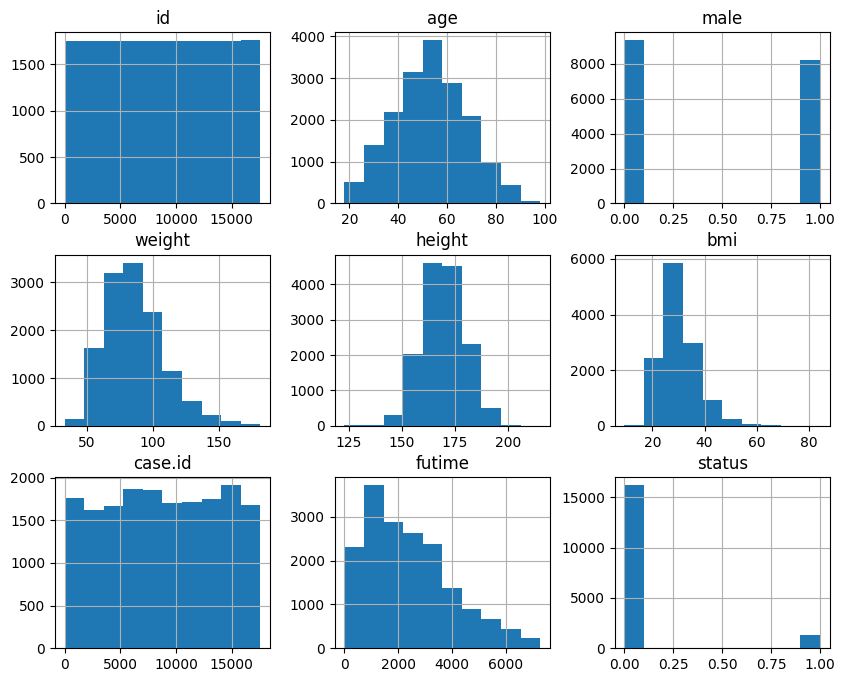

In [87]:
#Histogram
nafld1_data.hist(figsize = (10,8));

**Вывод**

График показывает распределение по столбцам данных в исследуемой группе:
- средний возраст  - 56 лет
- Женщин больше, чем мужчин
- средний вес  - 88 кг
- средний рост  - 169 см
- BMI - 30.0
- количество дней наблюдение в среднем  - 1500, то есть около 5 лет
- количество живых пациентов больше, чем умерших

**Boxplot / Violinplot**


Boxplot (ящик с усами) и violinplot (виолончельный график) используются для визуализации распределения данных и их статистических характеристик.


*Использование:*

Boxplot:

Позволяет увидеть медиану, квартиль, выбросы и разброс данных.

Удобен для сравнения нескольких групп.

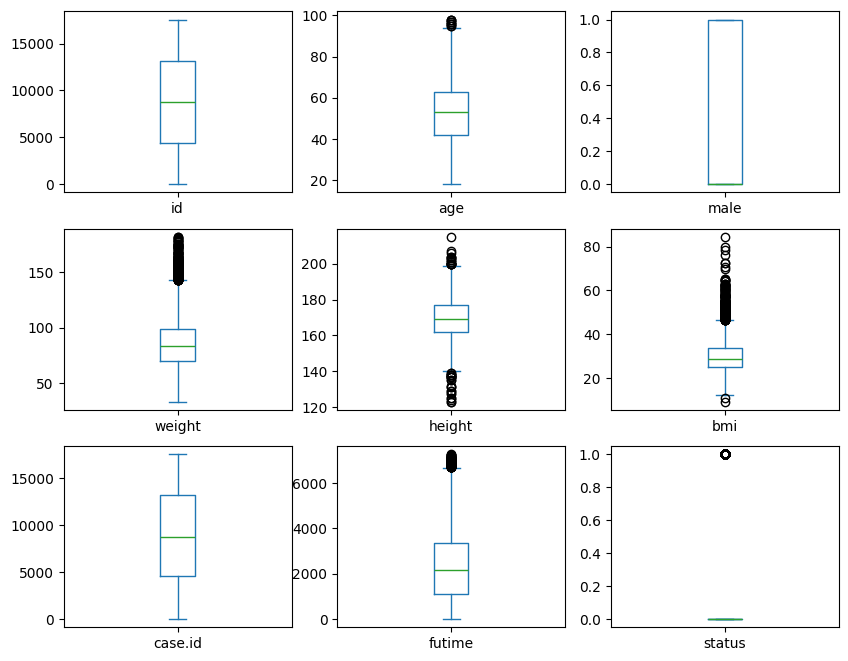

In [90]:
#Box Plot
nafld1_data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8));

**Вывод** Видим смещение распределения и выбросы в графах weight, height, bmi и futime. Вернемся к этому вопросу в разделе "очистка данных".

Важной частью любого исследования является расчет корреляции. Сначала напишем функцию, а затем построим тепловую карту.

In [95]:
#Напишем функцию для интерпретации результата коэффициента корреляции

def correlation_tie(correlation: float) -> str:
    """
    Определяет уровень корреляции на основе переданного значения корреляции.

    Параметры:
    correlation (float): Значение корреляции, которое должно находиться в диапазоне от 0 до 1.

    Возвращает:
    str или np.nan: Описание уровня корреляции:
        - "Практически нет корреляции" для значений от 0 до 0.2
        - "Слабая корреляция" для значений от 0.2 до 0.5
        - "Умеренная корреляция" для значений от 0.5 до 0.7
        - "Сильная корреляция" для значений от 0.7 до 0.9
        - "Очень сильная корреляция" для значений от 0.9 до 1
        - np.nan для некорректных значений корреляции (вне диапазона 0-1)
    """
    if isinstance(correlation, (int, float)) and 0 <= correlation < 0.2:
        return "Практически нет корреляции"
    elif isinstance(correlation, (int, float)) and 0.2 <= correlation < 0.5:
        return "Слабая корреляция"
    elif isinstance(correlation, (int, float)) and 0.5 <= correlation < 0.7:
        return "Умеренная корреляция"
    elif isinstance(correlation, (int, float)) and 0.7 <= correlation < 0.9:
        return "Сильная корреляция"
    elif isinstance(correlation, (int, float)) and 0.9 <= correlation <= 1:
        return "Очень сильная корреляция"
    else:
        return np.nan
#посмотрим отдельно корреляцию между весом и исходом заболевания
correlationIO = nafld1_data['weight'].corr(nafld1_data['bmi'])
# Применение функции к результату корреляции
result = correlation_tie(correlationIO)
# Вывод результата
print(f"Корреляция между 'weight' и 'bmi': {correlationIO}")
print(f"Уровень корреляции: {result}")

#посмотрим отдельно корреляцию между уровнем BMI и исходом заболевания
correlationGO = nafld1_data['bmi'].corr(nafld1_data['status'])
# Применение функции к результату корреляции
result = correlation_tie(correlationGO)
# Вывод результата
print(f"Корреляция между 'bmi' и 'status': {correlationGO}")
print(f"Уровень корреляции: {result}")

#посмотрим отдельно корреляцию между уровнем BloodPressure и Outcome
correlationBPO = nafld1_data['futime'].corr(nafld1_data['bmi'])
# Применение функции к результату корреляции
result = correlation_tie(correlationBPO)
# Вывод результата
print(f"Корреляция между 'bmi' и 'futime': {correlationBPO}")
print(f"Уровень корреляции: {result}")

Корреляция между 'weight' и 'bmi': 0.874544518625945
Уровень корреляции: Сильная корреляция
Корреляция между 'bmi' и 'status': -0.0004893263122630458
Уровень корреляции: nan
Корреляция между 'bmi' и 'futime': -0.005194558235315413
Уровень корреляции: nan


In [ ]:
#Correlation Plot
# Исключаем столбец BMI_Category
columns_to_include = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
corr_data = dataset1_df[columns_to_include].select_dtypes(include=['int64', 'float64'])  # Выбираем только числовые столбцы для корреляции

# Вычисление корреляционной матрицы
Corr = corr_data.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))  # Задаем размер графика
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Показываем график
plt.title('Correlation Heatmap (Excluding BMI_Category)')
plt.show()

**Вывод** 
Глюкоза показала сильную положительную корреляцию с наличием диабета (r = 0.65).

In [ ]:
# Lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(data=dataset1_df, x='Glucose', y='BMI', aspect=2)
plt.title('Линейная регрессия: BMI по уровню глюкозы')
plt.xlabel('Глюкоза')
plt.ylabel('BMI')
plt.grid()
plt.show()

**Вывод**
Показывает линейную регрессию: BMI по уровню глюкозы, чем выше BMI, тем выше уровень глюкозы в крови

In [ ]:
# violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=dataset1_df, x='BMI_Category', y='BMI')
plt.title('Violinplot: Сравнение BMI по категориям BMI')
plt.xlabel('Категория BMI')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Catplot для визуализации BMI по категориям Outcome
g = sns.catplot(data=dataset1_df, x='Outcome', y='BMI', kind='box', height=6, aspect=2)
g.fig.suptitle('Catplot: BMI по категориям результата', y=1.05)
plt.xlabel('Результат (0 - Нет диабета, 1 - Диабет)')
plt.ylabel('BMI')
plt.grid()
plt.show()

**Вывод** BMI по категориям результата: чем выше BMI, тем чаще диагностируют диабет

### **<center> Выводы на основании анализа первого датасета </center>**

1. Внешние факторы, оказывающие сильное влияние на развитие сахарного диабета:
- ИМТ
- возраст
- беременность
2. Внутренние факторы, оказывающие сильное влияние на развитие сахарного диабета:
- уровень глюкозы
- уровень инсулина
3. Факторы, не оказывающие влияния на развитие сахарного диабета:
- толщина кожи
- артериальное давление

**Профилактика развития сахарного диабета**
[по данным ВОЗ](https://www.who.int/ru/news-room/fact-sheets/detail/diabetes)
- добиться здоровой массы тела и поддерживать ее;
- поддерживать физически активный образ жизни, уделяя не менее 150 минут в неделю физическим упражнениям умеренной интенсивности;
- соблюдать здоровый рацион питания и уменьшать потребление сахаров и насыщенных жиров;
- измерение уровня сахара для выявления гестационного сахарного диабета

### **<center> Первичная обработка данных второго датасета</center>**

In [ ]:
#Прочитаем второй датасет и посмотрим на первые 5 строк
nafld2_data = pd.read_csv('nafld2.csv')
nafld2_data.head()

,Unnamed: 0,id,days,test,value
0,135077,1,-459,hdl,75.0
1,313143,1,-459,chol,75.0
2,135078,1,183,hdl,64.0
3,313144,1,183,chol,64.0
4,135079,1,2030,hdl,74.0


In [ ]:
#Прочитаем второй датасет и посмотрим на последние 5 строк
display(nafld2_data.tail())

,Unnamed: 0,id,days,test,value
400118,346651,17566,1954,chol,49.0
400119,168565,17566,2311,hdl,43.0
400120,346652,17566,2311,chol,43.0
400121,168566,17566,2744,hdl,47.0
400122,346653,17566,2744,chol,47.0


In [ ]:
#Получим информацию о количестве строк и столбцов
nafld2_data.shape

(400123, 5)

In [ ]:
#Получим детальную информацию о столбцах и типах данных
nafld2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400123 entries, 0 to 400122
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  400123 non-null  int64  
 1   id          400123 non-null  int64  
 2   days        400123 non-null  int64  
 3   test        400123 non-null  object 
 4   value       400123 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.3+ MB


In [ ]:
# получим описательную статистику по столбцам
nafld2_data.describe() 

,Unnamed: 0,id,days,value
count,400123.000000,400123.000000,400123.000000,400123.000000
mean,223150.240971,8799.153905,-606.916616,63.768339
std,127822.738489,5080.553294,2415.953135,48.455567
min,1.000000,1.000000,-7651.000000,0.000000
25%,113131.500000,4410.500000,-2259.000000,40.000000
50%,222978.000000,8813.000000,-530.000000,51.000000
75%,334078.500000,13159.000000,987.000000,72.000000
max,444423.000000,17566.000000,7187.000000,13682.000000


In [ ]:
# Удаляем столбец Unnamed:0, так как он не несет клинической значимости
nafld2_data = nafld2_data.drop(columns=['Unnamed: 0'])

# Проверяем результат
print(nafld2_data.head())

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
#проверим наличие пропусков в датасете
display(nafld2_data.isnull().tail())

,id,days,test,value
400118,False,False,False,False
400119,False,False,False,False
400120,False,False,False,False
400121,False,False,False,False
400122,False,False,False,False


**Вывод**: из таблицы можно было бы увидеть, где были пропущены значения, в данном случае пропущенных данных нет.

**Вывод**: можно увидеть, что у нас нет столбцов с пропусками данных

### **<center> Первичная обработка данных третьего датасета</center>**

In [ ]:
#Прочитаем третий датасет и посмотрим на первые 5 строк
nafld3_data = pd.read_csv('nafld3.csv')
nafld3_data.head()

,rownames,id,days,event
0,2,3,0,nafld
1,3,4,-1287,htn
2,4,4,-1287,dyslipidemia
3,5,4,-1226,ang/isc
4,7,4,-90,ang/isc


In [ ]:
#Прочитаем третий датасет и посмотрим на последние 5 строк
display(nafld3_data.tail())

,rownames,id,days,event
34335,38590,17563,0,nafld
34336,38591,17563,384,diabetes
34337,38592,17564,-1387,dyslipidemia
34338,38594,17566,-749,dyslipidemia
34339,38595,17566,157,diabetes


In [ ]:
#Получим информацию о количестве строк и столбцов
nafld3_data.shape

(34340, 4)

In [ ]:
#Получим детальную информацию о столбцах и типах данных
nafld3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34340 entries, 0 to 34339
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  34340 non-null  int64 
 1   id        34340 non-null  int64 
 2   days      34340 non-null  int64 
 3   event     34340 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.0+ MB


In [ ]:
# получим описательную статистику по столбцам
nafld3_data.describe() 

,rownames,id,days
count,34340.000000,34340.000000,34340.000000
mean,19286.780810,8746.168666,-1161.363454
std,11140.230743,5068.095337,2380.252885
min,2.000000,3.000000,-16700.000000
25%,9655.750000,4342.000000,-2651.000000
50%,19274.500000,8753.000000,-668.500000
75%,28924.250000,13119.250000,62.000000
max,38595.000000,17566.000000,6652.000000


In [ ]:
#проверим наличие пропусков в датасете
display(nafld3_data.isnull().tail())

,rownames,id,days,event
34335,False,False,False,False
34336,False,False,False,False
34337,False,False,False,False
34338,False,False,False,False
34339,False,False,False,False


**Вывод**: из таблицы можно увидеть, где были пропущены значения: ячейки со значением True; ячейки, где стоит False, были изначально заполнены

In [ ]:
# выведем на экран названия столбцов, где число пропусков больше 0.
# Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.
# Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат
cols_null_percent = nafld3_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Series([], dtype: float64)

**Вывод**: можно увидеть, что у нас нет столбцов с пропусками данных

### **<center> Предобработка данных </center>**

In [ ]:
# Объединение датасетов
# Используем метод merge для соединения по общему столбцу 'id'
merged_data = nafld1_data.merge(nafld2_data, on='id', how='outer')
merged_data = merged_data.merge(nafld3_data, on='id', how='outer')

# Определяем словарь с типами данных для преобразования
dtype_dict = {
    'age': 'int',
    'male': 'category',  
    'futime': 'int',
    'status': 'category',  
    'weight': 'float',
    'height': 'float',
    'bmi': 'float',
    'case.id': 'float',
    'days': 'int',
    'value': 'float',
    'event': 'category'
}

# Применяем метод astype() для преобразования типов данных
for column, dtype in dtype_dict.items():
    if column in merged_data.columns:  # Проверяем, существует ли столбец
        merged_data[column] = merged_data[column].astype(dtype)

# Проверка итогового DataFrame
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398903 entries, 0 to 1398902
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   Unnamed: 0_x  1398903 non-null  int64   
 1   id            1398903 non-null  int64   
 2   age           1398903 non-null  int64   
 3   male          1398903 non-null  category
 4   weight        1233544 non-null  float64 
 5   height        1324561 non-null  float64 
 6   bmi           1231272 non-null  float64 
 7   case.id       1392109 non-null  float64 
 8   futime        1398903 non-null  int64   
 9   status        1398903 non-null  category
 10  Unnamed: 0_y  1396860 non-null  float64 
 11  days_x        1396860 non-null  float64 
 12  test          1396860 non-null  object  
 13  value         1396860 non-null  float64 
 14  rownames      1373629 non-null  float64 
 15  days_y        1373629 non-null  float64 
 16  event         1373629 non-null  category
dtypes: categ

In [ ]:
# В задании указано, что нужно использовать лямбда функции. Давайте примененим лямбда-функции для создания нового столбца "BMI_Category"
merged_data['BMI_Category'] = merged_data['bmi'].apply(lambda x: 'Нормальный' if x < 25 else 'Избыточный' if x < 30 else 'Ожирение')
print(merged_data)

         Unnamed: 0_x     id  age male  weight  height        bmi  case.id  \
0                3631      1   57    0    60.0   163.0  22.690939  10630.0   
1                3631      1   57    0    60.0   163.0  22.690939  10630.0   
2                3631      1   57    0    60.0   163.0  22.690939  10630.0   
3                3631      1   57    0    60.0   163.0  22.690939  10630.0   
4                3631      1   57    0    60.0   163.0  22.690939  10630.0   
...               ...    ...  ...  ...     ...     ...        ...      ...   
1398898          6658  17566   69    1    94.1   180.0  29.204650   2017.0   
1398899          6658  17566   69    1    94.1   180.0  29.204650   2017.0   
1398900          6658  17566   69    1    94.1   180.0  29.204650   2017.0   
1398901          6658  17566   69    1    94.1   180.0  29.204650   2017.0   
1398902          6658  17566   69    1    94.1   180.0  29.204650   2017.0   

         futime status  Unnamed: 0_y  days_x  test  value  rown

### **<center> Разведывательный анализ данных</center>**

### **<center> Очистка данных</center>**

In [ ]:
# Создаем копию исходной таблицы
combine_data = merged_data.copy()

# Список столбцов, которые нужно проверить на нулевые значения
columns_to_check = ['id', 'age', 'weight', 'height', 'bmi', 
                    'case.id', 'futime', 'days_x', 
                    'test', 'value', 'rownames', 'days_y', 
                    'event', 'BMI_Category']

# Фильтруем данные, чтобы найти количество записей с нулевыми значениями в указанных столбцах
num_records_with_zeros = combine_data[combine_data[columns_to_check].isnull().any(axis=1)].shape[0]

# Выводим количество записей с нулями
print(num_records_with_zeros)

192160


In [ ]:
def remove_zero_values(combine_data: pd.DataFrame) -> pd.DataFrame:
    """
    Функция удаляет строки из DataFrame, где значения в указанных столбцах равны 0.

    Эта функция полезна для очистки данных перед анализом, так как нулевые значения могут указывать на отсутствие данных или ошибки в измерениях. 
    Удаление таких строк помогает повысить качество анализа и избежать искажений в результатах.

    Parameters:
    combine_data (pd.DataFrame): Входной DataFrame, содержащий данные о пациентах.

    Returns:
    pd.DataFrame: Новый DataFrame без строк с нулевыми значениями в указанных столбцах. Если в исходном DataFrame отсутствуют строки с нулевыми значениями, возвращается копия исходного DataFrame.
    """
    # Список столбцов, которые нужно проверить на нулевые значения
    columns_to_check = ['id', 'age', 'weight', 'height', 'bmi', 
                        'case.id', 'futime', 'days_x', 
                        'test', 'value', 'rownames', 'days_y', 
                        'event', 'BMI_Category']
    
    # Удаляем строки, где значения в указанных столбцах равны 0
    df_filtered = combine_data[(combine_data[columns_to_check] != 0).all(axis=1)]
    
    return df_filtered

# Теперь combine_data содержит только те строки, где в указанных столбцах нет нулевых значений
print(combine_data)

         Unnamed: 0_x     id  age male  weight  height        bmi  case.id  \
0                3631      1   57    0    60.0   163.0  22.690939  10630.0   
1                3631      1   57    0    60.0   163.0  22.690939  10630.0   
2                3631      1   57    0    60.0   163.0  22.690939  10630.0   
3                3631      1   57    0    60.0   163.0  22.690939  10630.0   
4                3631      1   57    0    60.0   163.0  22.690939  10630.0   
...               ...    ...  ...  ...     ...     ...        ...      ...   
1398898          6658  17566   69    1    94.1   180.0  29.204650   2017.0   
1398899          6658  17566   69    1    94.1   180.0  29.204650   2017.0   
1398900          6658  17566   69    1    94.1   180.0  29.204650   2017.0   
1398901          6658  17566   69    1    94.1   180.0  29.204650   2017.0   
1398902          6658  17566   69    1    94.1   180.0  29.204650   2017.0   

         futime status  Unnamed: 0_y  days_x  test  value  rown

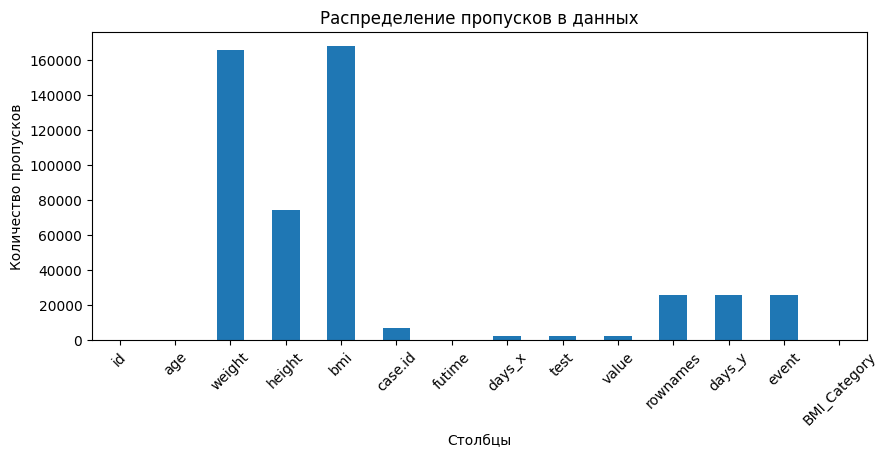

In [ ]:
# Список столбцов, которые нужно проверить на пропуски
columns_to_check = ['id', 'age', 'weight', 'height', 'bmi', 
                    'case.id', 'futime', 'days_x', 
                    'test', 'value', 'rownames', 'days_y', 
                    'event', 'BMI_Category']

# Подсчет пропусков в указанных столбцах
null_counts = combine_data[columns_to_check].isnull().sum()

# Построение столбчатой диаграммы
null_counts.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
)

# Показать график
plt.ylabel('Количество пропусков')
plt.xlabel('Столбцы')
plt.xticks(rotation=45)
plt.show()

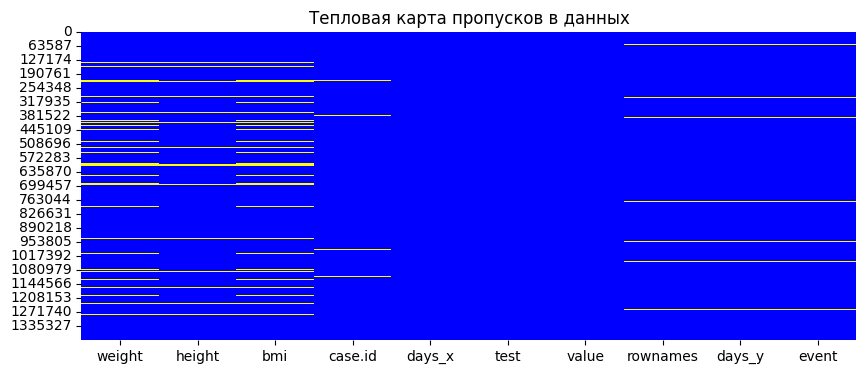

In [ ]:
# Подсчет пропусков в указанных столбцах
null_counts = combine_data[columns_to_check].isnull().sum()

# Создаем список цветов
colors = ['blue', 'yellow']

# Создаем фигуру
fig = plt.figure(figsize=(10, 4))

# Выбор столбцов с пропусками
cols_with_null = combine_data[columns_to_check].isnull().sum()
cols = cols_with_null[cols_with_null > 0].index  # выбираем только те столбцы, где есть пропуски

# Создание тепловой карты
ax = sns.heatmap(
    combine_data[cols].isnull(),
    cmap=sns.color_palette(colors),
    cbar=False,  # отключаем цветовую шкалу
)

# Настройка заголовка
plt.title('Тепловая карта пропусков в данных')

# Показать график
plt.show()

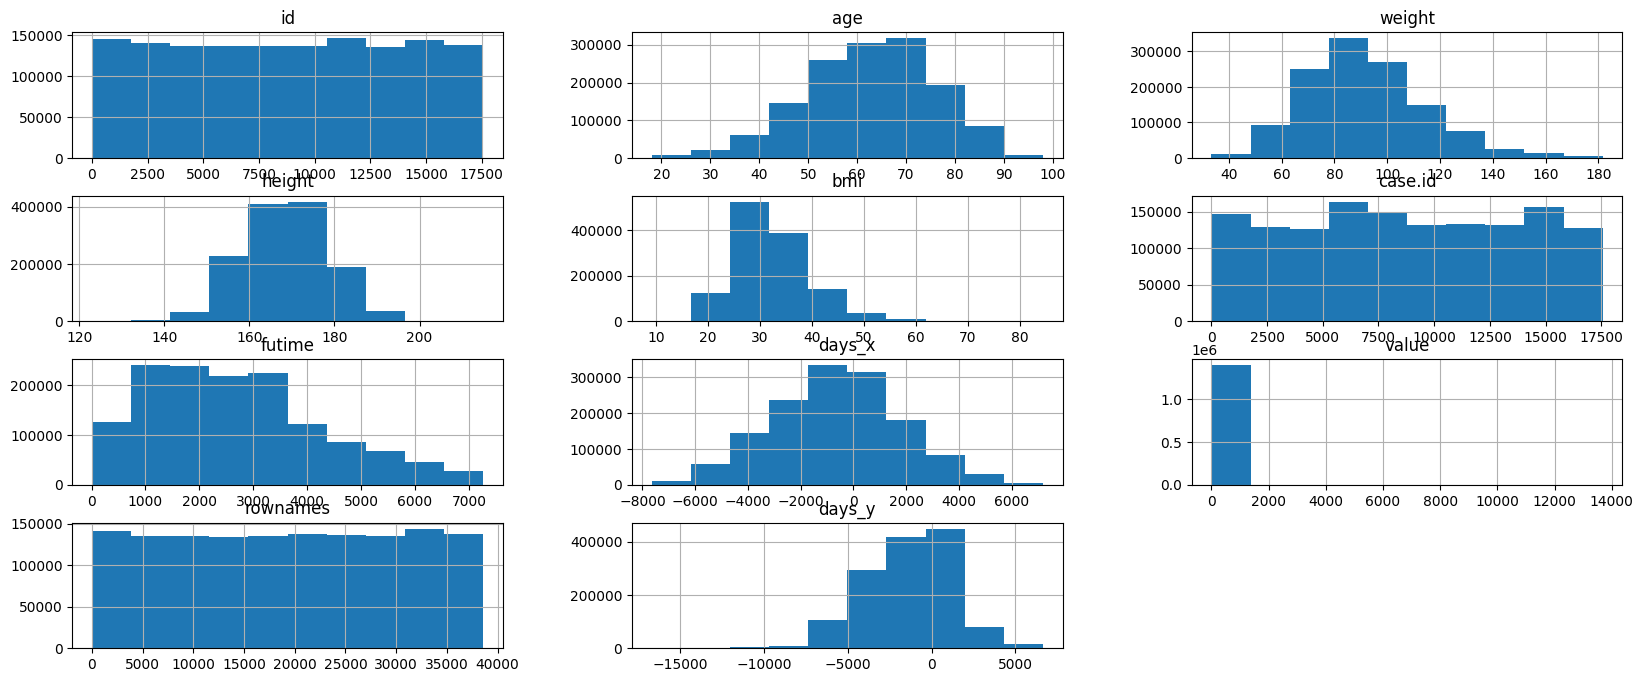

In [ ]:
#распределение признаков с пропусками.
cols = cols_with_null.index
combine_data[cols].hist(figsize=(20, 8));

In [ ]:
# Отбрасываем столбцы с числом пропусков более 20%
n = combine_data.shape[0]  # число строк в таблице
thresh = n * 0.8  # 80% от общего числа строк
combine_data = combine_data.dropna(thresh=thresh, axis=1)

# Отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1]  # число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m - 2, axis=0)

# Создаем словарь 'имя_столбца' : значение для замены пропусков
values = {
    'id': combine_data['id'].mode()[0],  
    'age': combine_data['age'].median(),
    'male': combine_data['male'].mode()[0],
    'weight': combine_data['weight'].median(),
    'height': combine_data['height'].median(),
    'bmi': combine_data['bmi'].median(),
    'case.id': combine_data['case.id'].median(),
    'futime': combine_data['futime'].median(),
    'status': combine_data['status'].mode()[0],
    'days_x': combine_data['days_x'].median(),
    'test': combine_data['test'].mode()[0],
    'value': combine_data['value'].median(),
    'rownames': combine_data['rownames'].mode()[0],
    'days_y': combine_data['days_y'].median(),
    'event': combine_data['event'].mode()[0],
    'BMI_Category': combine_data['BMI_Category'].mode()[0]
}

# Заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)

# Выводим результирующую долю пропусков
print(combine_data.isnull().mean())

Unnamed: 0_x    0.0
id              0.0
age             0.0
male            0.0
weight          0.0
height          0.0
bmi             0.0
case.id         0.0
futime          0.0
status          0.0
Unnamed: 0_y    0.0
days_x          0.0
test            0.0
value           0.0
rownames        0.0
days_y          0.0
event           0.0
BMI_Category    0.0
dtype: float64


In [ ]:
# Удаляем столбцы Unnamed: 0_x и Unnamed: 0_y
combine_data = combine_data.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

# Проверяем результат
print(combine_data.head())

    id  age male  weight  height        bmi  case.id  futime status  days_x  \
22   3   53    1   105.8   186.0  30.453537      3.0    1783      0 -3326.0   
23   3   53    1   105.8   186.0  30.453537      3.0    1783      0 -3326.0   
24   3   53    1   105.8   186.0  30.453537      3.0    1783      0 -2358.0   
25   3   53    1   105.8   186.0  30.453537      3.0    1783      0 -2358.0   
26   3   53    1   105.8   186.0  30.453537      3.0    1783      0 -1082.0   

    test  value  rownames  days_y  event BMI_Category  
22   hdl   52.0       2.0     0.0  nafld     Ожирение  
23  chol   52.0       2.0     0.0  nafld     Ожирение  
24   sbp  135.0       2.0     0.0  nafld     Ожирение  
25   dbp  135.0       2.0     0.0  nafld     Ожирение  
26   hdl   63.0       2.0     0.0  nafld     Ожирение  


In [ ]:
#Выведем результирующее число строк и столбцов:
print(combine_data.shape)

(1303996, 16)


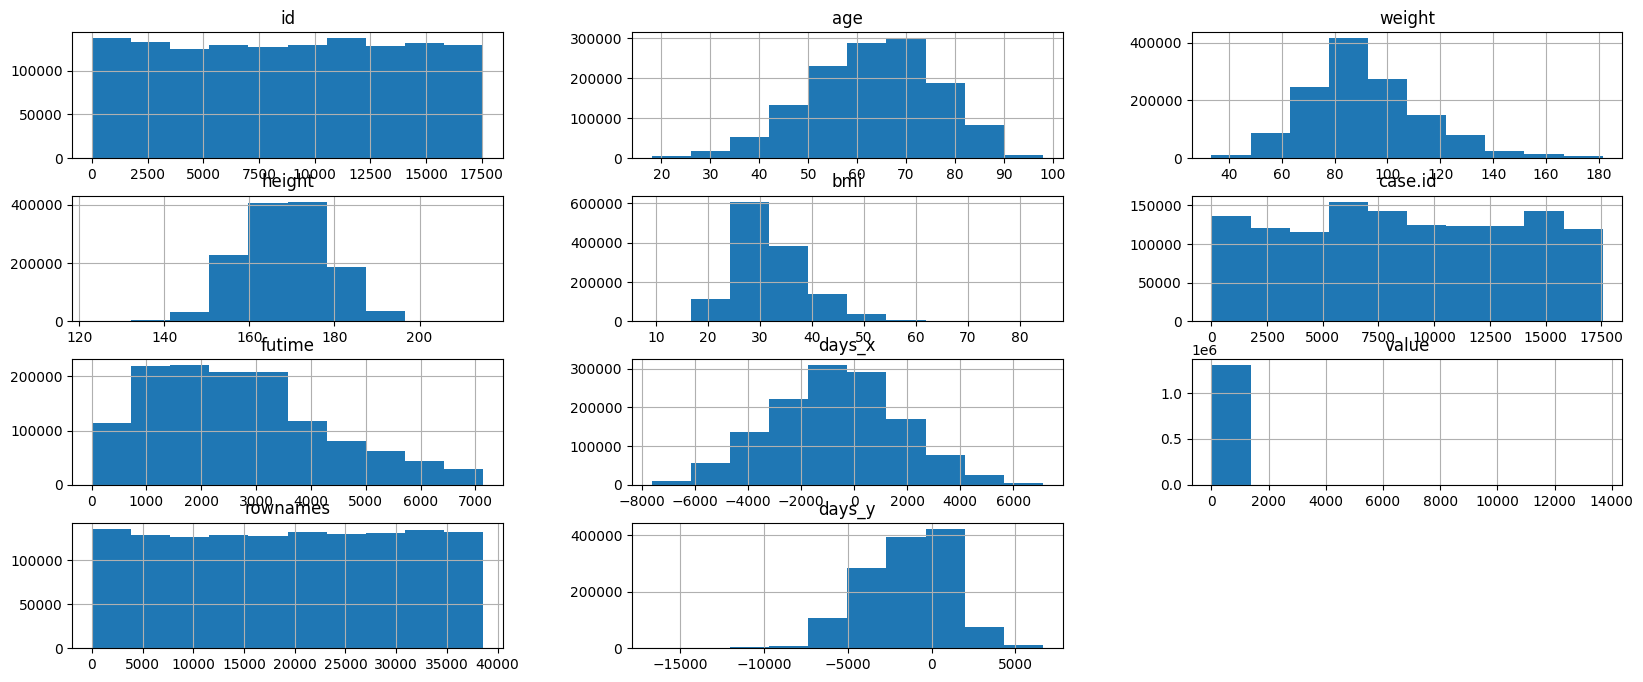

In [ ]:
cols = cols_with_null.index
combine_data[cols].hist(figsize=(20, 8));

In [ ]:
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id              0.0
age             0.0
male            0.0
weight          0.0
height          0.0
bmi             0.0
case.id         0.0
futime          0.0
status          0.0
days_x          0.0
test            0.0
value           0.0
rownames        0.0
days_y          0.0
event           0.0
BMI_Category    0.0
dtype: float64

In [ ]:
print(combine_data.shape)

(1303996, 16)


Выбросы

Пусть у нас есть признак, по которому мы будем искать выбросы. Давайте рассчитаем его статистические показатели (минимум, максимум, среднее, квантили) и по ним попробуем определить наличие аномалий.

Сделать это можно с помощью уже знакомого вам метода describe()

In [ ]:
print(combine_data.columns) 

Index(['id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id', 'futime',
       'status', 'days_x', 'test', 'value', 'rownames', 'days_y', 'event',
       'BMI_Category'],
      dtype='object')


In [ ]:
combine_data['age'] = pd.to_numeric(combine_data['age'], errors='coerce')

In [ ]:
#Рассчитаем статистические показатели для признака жилой площади (life_sq).

combine_data['age'].describe()

count    1.303996e+06
mean     6.278388e+01
std      1.299707e+01
min      1.800000e+01
25%      5.400000e+01
50%      6.400000e+01
75%      7.200000e+01
max      9.800000e+01
Name: age, dtype: float64

Результат, который вы получили с помощью метода describe() в Pandas, представляет собой статистическое резюме для столбца age в вашем DataFrame combine_data. Давайте разберем каждую из строк:




count: 1.303996e+06 — это общее количество значений в столбце age. В вашем случае это примерно 1,3 миллиона записей.




mean: 6.278388e+01 — это среднее значение возраста. В данном случае средний возраст составляет примерно 62.78 года.




std: 1.299707e+01 — это стандартное отклонение, которое показывает, насколько значения возраста разбросаны относительно среднего. Здесь стандартное отклонение составляет примерно 12.99 года.




min: 1.800000e+01 — это минимальное значение в столбце age, то есть самый младший возраст в вашей выборке, который составляет 18 лет.




25%: 5.400000e+01 — это 25-й процентиль (первый квартиль), что означает, что 25% значений возраста меньше или равны 54 годам.




50%: 6.400000e+01 — это медиана (50-й процентиль), которая делит данные пополам. Половина значений возраста меньше или равны 64 годам.




75%: 7.200000e+01 — это 75-й процентиль (третий квартиль), что означает, что 75% значений возраста меньше или равны 72 годам.




max: 9.800000e+01 — это максимальное значение в столбце age, то есть самый старший возраст в вашей выборке, который составляет 98 лет.



In [ ]:
# А теперь выведем здания с жилой площадью более 7 000 квадратных метров:

display(combine_data[combine_data['age'] > 80])

,id,age,male,weight,height,bmi,case.id,futime,status,days_x,test,value,rownames,days_y,event,BMI_Category
3442,55,86,1,89.5,173.0,31.396918,9328.0,911,1,-3741.0,hdl,34.0,103.0,-3741.0,dyslipidemia,Ожирение
3443,55,86,1,89.5,173.0,31.396918,9328.0,911,1,-3741.0,hdl,34.0,104.0,-3586.0,stroke,Ожирение
3444,55,86,1,89.5,173.0,31.396918,9328.0,911,1,-3741.0,hdl,34.0,105.0,-3565.0,afib,Ожирение
3445,55,86,1,89.5,173.0,31.396918,9328.0,911,1,-3741.0,hdl,34.0,106.0,-2850.0,htn,Ожирение
3446,55,86,1,89.5,173.0,31.396918,9328.0,911,1,-3741.0,hdl,34.0,107.0,-292.0,heart failure,Ожирение
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394673,17529,90,1,67.7,169.0,23.703652,15651.0,835,0,-932.0,chol,53.0,38505.0,-2287.0,htn,Нормальный
1394674,17529,90,1,67.7,169.0,23.703652,15651.0,835,0,-33.0,hdl,59.0,38504.0,-6732.0,dyslipidemia,Нормальный
1394675,17529,90,1,67.7,169.0,23.703652,15651.0,835,0,-33.0,hdl,59.0,38505.0,-2287.0,htn,Нормальный
1394676,17529,90,1,67.7,169.0,23.703652,15651.0,835,0,-33.0,chol,59.0,38504.0,-6732.0,dyslipidemia,Нормальный


In [ ]:
#Логичен вопрос: а много ли у нас таких квартир, у которых жилая площадь больше, чем суммарная?

#Давайте проверим это с помощью фильтрации:

outliers = combine_data[combine_data['days_x'] > combine_data['age']]
print(outliers.shape[0])

497429


In [ ]:
#Таких квартир оказывается 37 штук. Подобные наблюдения уже не поддаются здравому смыслу — они являются ошибочными, и от них стоит избавиться. Для этого можно воспользоваться методом drop() и удалить записи по их индексам:

cleaned = combine_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 806567


Метод межквартильного размаха (метод Тьюки)

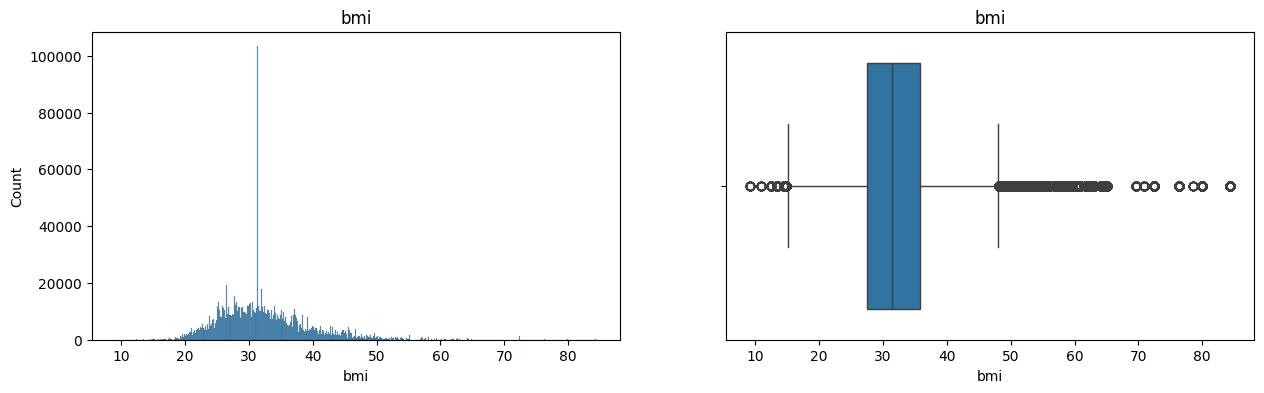

In [ ]:
#Построим гистограмму и коробчатую диаграмму для bmi:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=combine_data, x='bmi', ax=axes[0]);
histplot.set_title('bmi');
boxplot = sns.boxplot(data=combine_data, x='bmi', ax=axes[1]);
boxplot.set_title('bmi');

In [ ]:
#В соответствии с этим алгоритмом напишем функцию outliers_iqr(),
# которая вам может ещё не раз пригодиться в реальных задачах.
# Эта функция принимает на вход DataFrame и признак, по которому ищутся выбросы, а затем возвращает потенциальные выбросы,
# найденные с помощью метода Тьюки, и очищенный от них датасет.

#Квантили вычисляются с помощью метода quantile().
# Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 0.8)
    upper_bound = quartile_3 + (iqr * 0.8)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, cleaned = outliers_iqr(combine_data, 'bmi')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 150388
Результирующее число записей: 1153608


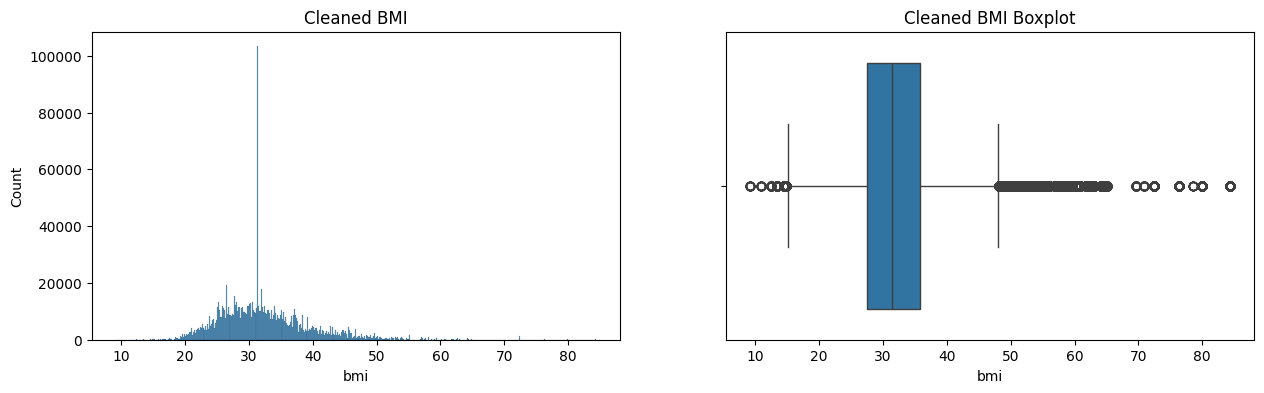

In [ ]:
#Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице. Давайте построим гистограмму и коробчатую диаграмму на новых данных cleaned_sber_data:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=combine_data, x='bmi', ax=axes[0]);
histplot.set_title('Cleaned BMI');
boxplot = sns.boxplot(data=combine_data, x='bmi', ax=axes[1]);
boxplot.set_title('Cleaned BMI Boxplot');

Классический метод межквартильного размаха не учитывает особенностей распределения! Он требует, чтобы данные были распределены плюс-минус нормально (гистограмма должна быть похожа на колокол), и требует от распределения примерной симметричности (чтобы у гистограммы были одинаковые хвосты в обе стороны).

Метод z-отклонений (метод сигм)

Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.

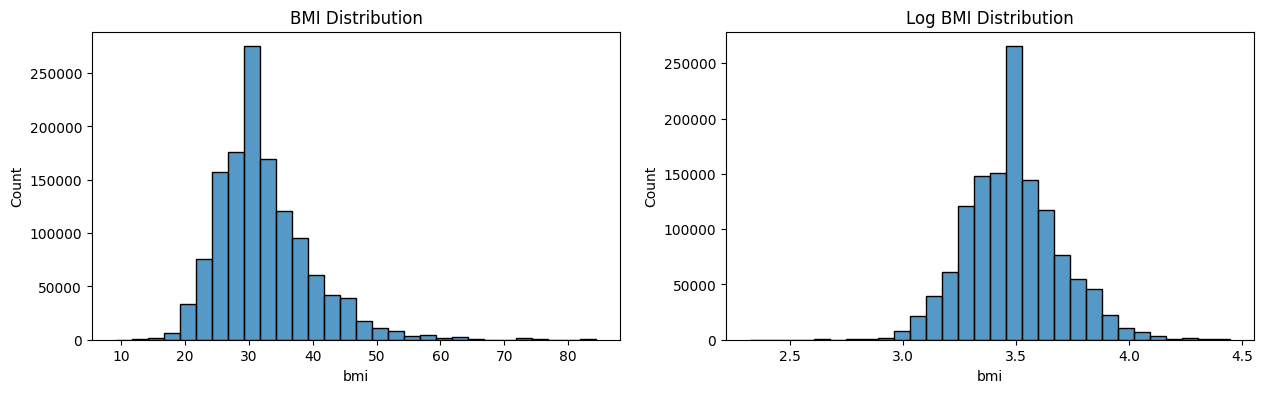

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(combine_data['bmi'], bins=30, ax=axes[0])
histplot.set_title('BMI Distribution');

#гистограмма в логарифмическом масштабе
log_bmi= np.log(combine_data['bmi'] + 1)
histplot = sns.histplot(log_bmi, bins=30, ax=axes[1])
histplot.set_title('Log BMI Distribution');

In [ ]:
#Напишем функцию outliers_z_score(), которая реализует этот алгоритм. 

#На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать рассматриваемый признак, иначе оставляем его в исходном виде.

#Как и раньше, функция будет возвращать выбросы и очищенные от них данные:

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:

In [ ]:
outliers, cleaned = outliers_z_score(combine_data, 'bmi', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 8402
Результирующее число записей: 1295594


Итак, метод z-отклонения нашел нам 33 потенциальных выброса по признаку расстояния до МКАД. Давайте узнаем, в каких районах (sub_area) представлены эти квартиры:

In [ ]:
print(outliers['bmi'].unique())

[60.68867067 59.45227015 61.70668889 60.87177438 72.38293444 62.78579863
 69.5849732  60.18848137 65.15601343 61.97809019 16.25776469 62.46309996
 15.37818388 15.98796648 62.99694344 14.48606302 62.46190254 15.44848594
 10.92133973 62.19565592 16.6052519  13.43543879 13.48669773 60.82321692
 84.395725   16.54269422 60.90188008 15.87523347 62.89613712 60.30636526
 64.82435929 79.93559366 15.20956654 62.5574896  59.54553796 60.18315232
  9.20733155 72.44141246 70.8570555  78.58217245 61.71875    12.44171396
 14.85714286 14.77246273 59.44560167 64.37137234 60.74207504 64.77761083
 16.10738102 64.20578416 76.34009287 61.82204637]


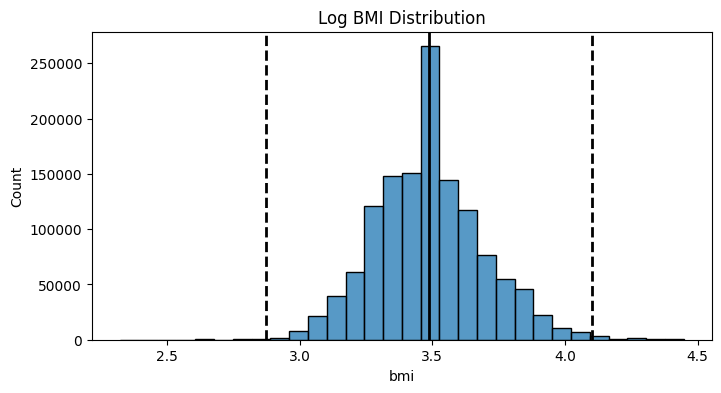

In [ ]:
 #Возможно, мы не учли того факта, что наш логарифм распределения всё-таки не идеально нормален и в нём присутствует некоторая асимметрия. Возможно, стоит дать некоторое «послабление» на границы интервалов? Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_bmi = np.log(combine_data['bmi'] + 1)
histplot = sns.histplot(log_bmi, bins=30, ax=ax)
histplot.axvline(log_bmi.mean(), color='k', lw=2)
histplot.axvline(log_bmi.mean()+ 3 * log_bmi.std(), color='k', ls='--', lw=2)
histplot.axvline(log_bmi.mean()- 3 * log_bmi.std(), color='k', ls='--', lw=2)
histplot.set_title('Log BMI Distribution');

Работа с дубликатами и неинформативными признаками

In [ ]:
combine_data['id'].nunique() == combine_data.shape[0]

False

Найдём число полных дубликатов таблице sber_data. Предварительно создадим список столбцов dupl_columns, по которым будем искать совпадения (все столбцы, не включая id). 

Создадим маску дубликатов с помощью метода duplicated() и произведём фильтрацию. Результат заносим в переменную sber_duplicates. Выведем число строк в результирующем DataFrame:

In [ ]:
dupl_columns = list(combine_data.columns)
dupl_columns.remove('id')

mask = combine_data.duplicated(subset=dupl_columns)
sber_duplicates = combine_data[mask]
print(f'Число найденных дубликатов: {combine_data.shape[0]}')

Число найденных дубликатов: 1303996


Создадим новую таблицу sber_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов

In [ ]:
data_dedupped = combine_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {data_dedupped.shape[0]}')

Результирующее число записей: 1294468


Обнаружение и ликвидация неинформативных признаков

Разберём алгоритм:

→ Создаём пустой список low_information_cols, куда будем добавлять названия признаков, которые мы посчитаем неинформативными.

→ В цикле пройдёмся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:

рассчитаем top_freq — наибольшую относительную частоту с помощью метода value_counts() с параметром normalize=True. Метод вернёт долю от общих данных, которую занимает каждое уникальное значение в признаке.
Например, для столбца oil_chemistry_raion (нефтехимический район) результат будет следующим:



Отсюда нам нужен максимум.

рассчитаем nunique_ratio — отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных значений в столбце получим с помощью метода nunique(), а размер признака — с помощью метода count(). Например, для столбца id число уникальных значений — 30471; оно же равно размеру таблицы. Поэтому результат отношения будет 1.
сравним каждое из полученных чисел с пороговым значением (у нас это 0.95) и добавим в список неинформативных признаков, если условие истинно.

In [ ]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in combine_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = combine_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = combine_data[col].nunique() / combine_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

нет неинформативных признаков

### **<center> Подведение итогов и выводы</center>**